In [60]:
import pandas as pd

weather = pd.read_csv(r"/content/weather.csv", index_col='DATE')

In [61]:
weather

,STATION,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,80.0,90.0,NaN,NaN,NaN,0,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,30.0,20.0,NaN,NaN,NaN,0,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,80.0,100.0,NaN,NaN,NaN,5,0,0.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,10.0,20.0,NaN,NaN,NaN,0,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,30.0,10.0,NaN,NaN,NaN,0,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-21,USW00094789,NaN,NaN,50.0,NaN,NaN,0,0,0.0,257.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-22,USW00094789,NaN,NaN,30.0,NaN,NaN,10,0,0.0,257.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-23,USW00094789,NaN,NaN,56.0,NaN,NaN,0,0,0.0,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The **basic requirements** of data to make it ready for **Machine Learning** are as follows:-
1. There should be **no missing values**.
2. All the **columns**(including index) should have the **correct data type**.

In [62]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
ACMH       0.516834
ACSH       0.516784
AWND       0.258593
FMTM       0.491256
PGTM       0.383467
PRCP       0.000000
SNOW       0.000000
SNWD       0.000101
TAVG       0.659447
TMAX       0.000000
TMIN       0.000000
TSUN       0.998442
WDF1       0.517035
WDF2       0.484824
WDF5       0.488995
WDFG       0.742663
WDFM       0.999950
WESD       0.694925
WSF1       0.516884
WSF2       0.484824
WSF5       0.489045
WSFG       0.624975
WSFM       0.999950
WT01       0.630402
WT02       0.934724
WT03       0.933216
WT04       0.982613
WT05       0.981709
WT06       0.990854
WT07       0.994573
WT08       0.801508
WT09       0.992965
WT11       0.999296
WT13       0.890201
WT14       0.955427
WT15       0.997889
WT16       0.669497
WT17       0.996985
WT18       0.941357
WT19       0.999950
WT21       0.999749
WT22       0.997538
WV01       0.999950
dtype: float64

In [63]:
valid_columns = weather.columns[null_pct < 0.05]
valid_columns

Index(['STATION', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [64]:
# Whenever we want to assign a slice of a dataframe to itself, use copy() otherwise there'll be an error.

weather = weather[valid_columns].copy()

In [65]:
weather.columns = weather.columns.str.lower()
weather

,station,prcp,snow,snwd,tmax,tmin
DATE,,,,,,
1970-01-01,USW00094789,0,0,0.0,-22,-56
1970-01-02,USW00094789,0,0,0.0,-6,-56
1970-01-03,USW00094789,5,0,0.0,33,-39
1970-01-04,USW00094789,0,0,0.0,-6,-50
1970-01-05,USW00094789,0,0,0.0,17,-61
...,...,...,...,...,...,...
2024-06-21,USW00094789,0,0,0.0,328,200
2024-06-22,USW00094789,10,0,0.0,306,222
2024-06-23,USW00094789,0,0,0.0,294,211


In [66]:
# ffill() fills the missing values in the dataframe by looking at the last non-mising value.

weather = weather.ffill()

In [67]:
weather.apply(pd.isnull).sum()    # Now there'll be no missing value in the dataframe.

station    0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [68]:
weather.apply(lambda x: (x == 9999).sum())

station    0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [69]:
weather.dtypes

station     object
prcp         int64
snow         int64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [70]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2024-06-16', '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20',
       '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24', '2024-06-25'],
      dtype='object', name='DATE', length=19900)

In [71]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2024-06-16', '2024-06-17', '2024-06-18', '2024-06-19',
               '2024-06-20', '2024-06-21', '2024-06-22', '2024-06-23',
               '2024-06-24', '2024-06-25'],
              dtype='datetime64[ns]', name='DATE', length=19900, freq=None)

In [72]:
# Now we're gonna make sure we don't have any gaps in our data.
# If we have too many gaps in our data, then we'll not be able to make any predictions.

weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    177
Name: count, dtype: int64

<Axes: xlabel='DATE'>

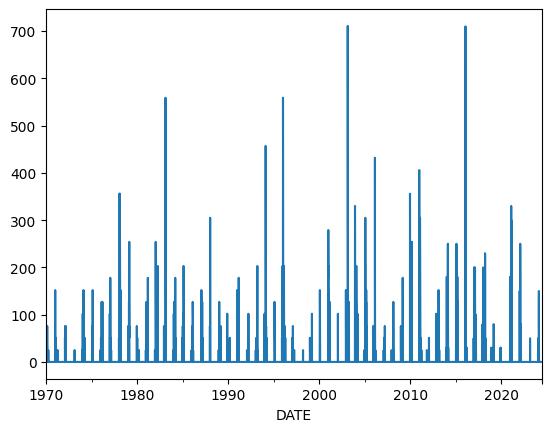

In [73]:
weather["snwd"].plot()

In [74]:
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,
1970-01-01,USW00094789,0,0,0.0,-22,-56,-6.0
1970-01-02,USW00094789,0,0,0.0,-6,-56,33.0
1970-01-03,USW00094789,5,0,0.0,33,-39,-6.0
1970-01-04,USW00094789,0,0,0.0,-6,-50,17.0
1970-01-05,USW00094789,0,0,0.0,17,-61,22.0
...,...,...,...,...,...,...,...
2024-06-21,USW00094789,0,0,0.0,328,200,306.0
2024-06-22,USW00094789,10,0,0.0,306,222,294.0
2024-06-23,USW00094789,0,0,0.0,294,211,294.0


In [75]:
weather = weather.ffill()
weather

,station,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,
1970-01-01,USW00094789,0,0,0.0,-22,-56,-6.0
1970-01-02,USW00094789,0,0,0.0,-6,-56,33.0
1970-01-03,USW00094789,5,0,0.0,33,-39,-6.0
1970-01-04,USW00094789,0,0,0.0,-6,-50,17.0
1970-01-05,USW00094789,0,0,0.0,17,-61,22.0
...,...,...,...,...,...,...,...
2024-06-21,USW00094789,0,0,0.0,328,200,306.0
2024-06-22,USW00094789,10,0,0.0,306,222,294.0
2024-06-23,USW00094789,0,0,0.0,294,211,294.0


In [76]:
# Now we'll apply Ridge Regression Model
# A Ridge Regresion Model works very similerly to linear regression model,
# except it penalizes the coefficients to account for the multi-collinearity.
# It helps adjust collinearity to some extent.

from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

# The alpha parameter controls how much the coefficients are shrunk to account for collinearity.

In [77]:
predictors = weather.columns[~weather.columns.isin(["target", "station"])]

In [78]:
# To estimate the error of a ML model, we can use Cross-Validation except with time-series data.
# With time-series data we should make sure not to use future data to predict the past.
# We'll use a special technique, Backtesting or Time-series Cross-validation to account for the time-series nature of the data.

def backtest(weather, model, predictors, start=3650, step=90):
  all_predictions = []

  for i in range(start, weather.shape[0], step):
    train = weather.iloc[:i,:]
    test = weather.iloc[i:(i+step),:]       # iloc(start_row:end_row, start_column:end_column)

    model.fit(train[predictors], train["target"])       # To fit our Ridge Regression Model to the data

    preds = model.predict(test[predictors])      # It'll generate predictions in the form of a numPy array
    preds = pd.Series(preds, index=test.index)    # To convert into pandas series, b'coz it's easy to handle.
    combined = pd.concat([test["target"], preds], axis=1)   # Both series combined along different columns i.e. treat everything passed-in like separate columns.
    combined.columns = ["actual", "prediction"]
    combined["diff"] = (combined["prediction"] - combined["actual"]).abs()    # To take absolute difference

    all_predictions.append(combined)
  return pd.concat(all_predictions)   # By default axis=0 i.e. treat everything pased-in like separate rows.


In [79]:
predictions = backtest(weather, rr, predictors)

In [80]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,61.0,101.442091,40.442091
1979-12-31,56.0,64.619754,8.619754
1980-01-01,50.0,53.587230,3.587230
1980-01-02,22.0,66.203415,44.203415
1980-01-03,-11.0,45.610541,56.610541
...,...,...,...
2024-06-21,306.0,298.108543,7.891457
2024-06-22,294.0,299.229729,5.229729
2024-06-23,294.0,288.432068,5.567932


In [81]:
# Now we'll generate an Accuracy Metric
# We'll use Mean Absolute Error(MAE) metric

from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

28.533149780469696

In [82]:
predictions["diff"].mean()

28.533149780469696

In [83]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2007-03-26,256.0,98.515618,157.484382
1999-01-02,117.0,-33.747931,150.747931
1998-03-26,267.0,116.866210,150.133790
1985-04-18,289.0,139.332078,149.667922
1990-03-12,294.0,145.189398,148.810602
...,...,...,...
1985-12-27,33.0,32.992573,0.007427
1980-02-23,94.0,94.006605,0.006605
1989-04-02,100.0,99.994816,0.005184


In [84]:
pd.Series(rr.coef_, index=predictors)

prcp   -0.026234
snow   -0.090254
snwd    0.011187
tmax    0.450793
tmin    0.513681
dtype: float64

In [85]:
def pct_diff(old, new):
  return (new - old)/old

def compute_rolling(weather, horizon, col):
  label = f"rolling_{horizon}_{col}"
  weather[label] = weather[col].rolling(horizon).mean()
  weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
  return weather

rolling_horizons = [3,14]
for horizon in rolling_horizons:
  for col in ["tmax", "tmin", "prcp"]:
    weather = compute_rolling(weather, horizon, col)

In [86]:
# It'll not be ideally good to take mean of all the data to predict for e.g. 1980 data, b'coz at that point we'll be not knowing the future data i.e. of for e.g. 1990, 1991 etc.
# We'll take data upto only that day whose data is to be predicted, and take mean [including that day].

def expand_mean(df):
  return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
  weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
  weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [87]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [88]:
predictors = weather.columns[~weather.columns.isin(["target", "station"])]

In [89]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [90]:
mean_squared_error(predictions["actual"], predictions["prediction"])

1325.789278649633

In [91]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2007-03-26,256.0,98.515618,157.484382
1999-01-02,117.0,-33.747931,150.747931
1998-03-26,267.0,116.866210,150.133790
1985-04-18,289.0,139.332078,149.667922
1990-03-12,294.0,145.189398,148.810602
...,...,...,...
1985-12-27,33.0,32.992573,0.007427
1980-02-23,94.0,94.006605,0.006605
1989-04-02,100.0,99.994816,0.005184


In [92]:
weather.loc["1990-03-07": "1990-03-17"]

,station,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,0,0,51.0,0,-100,39.0,9.333333,-1.000000,-72.333333,...,-38.928571,1.568807,12.142857,-1.000000,92.164274,74.666667,14.288676,-0.761905,30.349282,28.333333
1990-03-08,USW00094789,0,0,25.0,39,-67,61.0,16.666667,1.340000,-74.333333,...,-44.142857,0.517799,10.357143,-1.000000,92.079618,80.809524,14.159236,-4.428571,30.300955,19.523810
1990-03-09,USW00094789,3,0,0.0,61,-17,83.0,33.333333,0.830000,-61.333333,...,-51.285714,-0.668524,8.000000,-0.625000,92.030207,75.619048,14.109698,-5.809524,30.257552,9.238095
1990-03-10,USW00094789,3,0,0.0,83,39,150.0,61.000000,0.360656,-15.000000,...,-47.714286,-1.817365,5.285714,-0.432432,92.015873,65.571429,14.149206,-1.333333,30.214286,18.333333
1990-03-11,USW00094789,13,0,0.0,150,50,150.0,98.000000,0.530612,24.000000,...,-36.214286,-2.380671,5.500000,1.363636,92.107765,78.523810,14.206022,-0.476190,30.187005,32.238095
1990-03-12,USW00094789,0,0,0.0,150,61,294.0,127.666667,0.174935,50.000000,...,-22.714286,-3.685535,5.500000,-1.000000,92.199367,89.666667,14.280063,12.714286,30.139241,42.619048
1990-03-13,USW00094789,0,0,0.0,294,50,167.0,198.000000,0.484848,53.666667,...,-14.000000,-4.571429,5.142857,-1.000000,92.518167,93.047619,14.336493,12.666667,30.091627,23.238095
1990-03-14,USW00094789,0,0,0.0,167,78,128.0,203.666667,-0.180033,63.000000,...,-6.428571,-13.133333,5.142857,-1.000000,92.635647,101.047619,14.436909,26.666667,30.044164,65.904762
1990-03-15,USW00094789,0,0,0.0,128,61,167.0,196.333333,-0.348048,63.000000,...,1.071429,55.933333,5.142857,-1.000000,92.691339,98.333333,14.510236,21.000000,29.996850,17.000000


In [93]:
diff_value_count = (predictions["diff"].round().value_counts().sort_index() / predictions.shape[0])
diff_value_count

diff
0.0      0.012123
1.0      0.026708
2.0      0.022708
3.0      0.023938
4.0      0.022215
           ...   
146.0    0.000062
149.0    0.000062
150.0    0.000123
151.0    0.000062
157.0    0.000062
Name: count, Length: 143, dtype: float64

<Axes: xlabel='diff'>

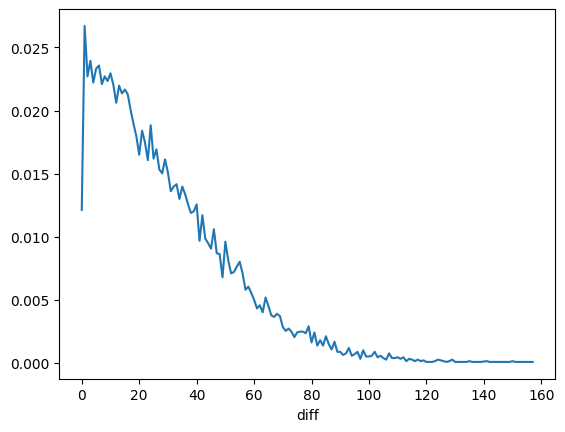

In [94]:
diff_value_count.plot()

In [95]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,61.0,101.442091,40.442091
1979-12-31,56.0,64.619754,8.619754
1980-01-01,50.0,53.587230,3.587230
1980-01-02,22.0,66.203415,44.203415
1980-01-03,-11.0,45.610541,56.610541
...,...,...,...
2024-06-21,306.0,298.108543,7.891457
2024-06-22,294.0,299.229729,5.229729
2024-06-23,294.0,288.432068,5.567932
